In [24]:
from google.colab import files
uploaded = files.upload() 

for fn in uploaded.keys(): 
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving husky.png to husky.png
User uploaded file "husky.png" with length 70925 bytes


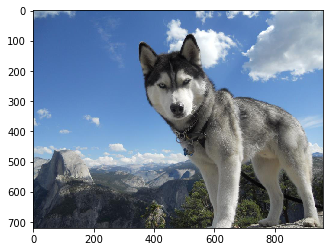

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

dog = np.array(Image.open('husky.jpg'))

plt.figure()
plt.imshow(dog)
plt.show()

please click 3 points


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


you clicked: []


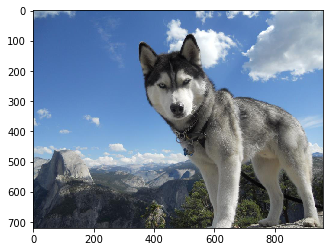

In [31]:
plt.imshow(dog)
print('please click 3 points')
x = plt.ginput(3)
print('you clicked: %s' % x)
plt.show()

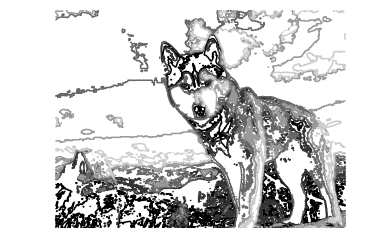

In [36]:
dog_grayscale = np.asarray(Image.open('husky.jpg').convert('L'))
plt.gray()
plt.contour(dog_grayscale, origin = 'image')
plt.axis('equal')
plt.axis('off')
plt.show()

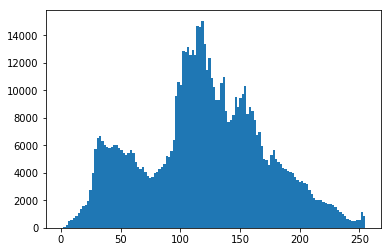

In [37]:
plt.figure()
plt.hist(dog_grayscale.flatten(), 128)   
plt.show()

In [0]:
pil_im = Image.fromarray(im)

def computeAverage(imList):
    avgIm = np.array(Image.open(imList[0]), 'f')
    
    for imName in imList[1:]:
        try:
            avgIm += np.array(Image.open(imName))
        except:
            print(imname + '...skipped')
    avgIm /= len(imList)
    
    return np.array(avgIm, 'uint8')

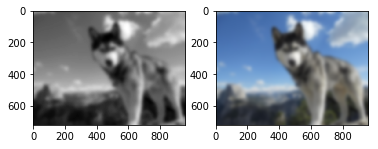

In [41]:
from scipy.ndimage import filters

dogBlur1 = filters.gaussian_filter(dog_grayscale, 10)  


dogBlur2 = np.zeros(dog.shape)  
for i in range(3):
    dogBlur2[:,:,i] = filters.gaussian_filter(dog[:,:,i], 10)
dogBlur2 = np.uint8(dogBlur2)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(dogBlur1)
ax2.imshow(dogBlur2)
plt.show()

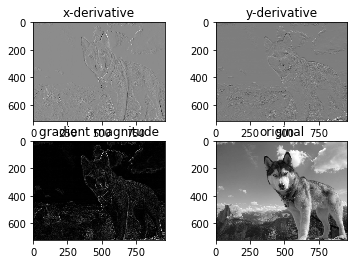

In [42]:
imx = np.zeros(dog_grayscale.shape)
filters.sobel(dog_grayscale, 1, imx)

imy = np.zeros(dog_grayscale.shape)
filters.sobel(dog_grayscale, 0, imy)

magnitude = np.hypot(imx, imy)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(imx)
ax1.set_title('x-derivative')
ax2.imshow(imy)
ax2.set_title('y-derivative')
ax3.imshow(magnitude)
ax3.set_title('gradient magnitude')
ax4.imshow(dog_grayscale)
ax4.set_title('original')
plt.show()